# SQL Weekend Project
- [Requirements](https://docs.google.com/document/d/1_p0GndxoUw0MqNsIEiNVNNy-pBsaYiMPHDqwPznMZ_k/edit?usp=sharing)

### EBTISAM ALRUHAILY, AlJOWHARA ALBLAIHED, GHADI KALID, MASHAEL AL-SAEED


### Start up BlazingSQL 

In [13]:
from blazingsql import BlazingContext

bc = BlazingContext()

BlazingContext ready


### Connect to S3 bucket

In [14]:
bc.s3('blazingsql-colab', bucket_name='blazingsql-colab')

(True,
 '',
 OrderedDict([('type', 's3'),
              ('bucket_name', 'blazingsql-colab'),
              ('access_key_id', ''),
              ('secret_key', ''),
              ('session_token', ''),
              ('encryption_type', <S3EncryptionType.NONE: 1>),
              ('kms_key_amazon_resource_name', ''),
              ('endpoint_override', ''),
              ('region', '')]))

### Create Table from S3

In [15]:
bc.create_table('taxi', 's3://blazingsql-colab/yellow_taxi/taxi_data.parquet')

## Write 20+ Queries

In [16]:
# Show all data from taxi table
query = '''
        Select * 
        FROM taxi
        
        '''
bc.sql(query)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_x,pickup_y,RateCodeID,store_and_fwd_flag,dropoff_x,dropoff_y,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
0,2.0,2015-03-05 07:38:36,2015-03-05 07:44:06,1.0,1.10,-8235279.565,4975191.631,1.0,N,-8235303.346,4973620.602,1.0,6.0,0.0,0.5,2.00,0.0,8.80
1,1.0,2015-02-03 05:41:55,2015-02-03 05:46:54,1.0,0.70,-8235656.655,4972873.569,1.0,N,-8236483.024,4973822.361,1.0,5.5,0.5,0.5,1.36,0.0,8.16
2,2.0,2015-02-08 16:17:51,2015-02-08 16:37:45,1.0,3.65,-8238228.336,4974965.742,1.0,N,-8233503.678,4978004.758,2.0,16.0,0.0,0.5,0.00,0.0,16.80
3,2.0,2015-03-07 02:17:05,2015-03-07 02:22:18,3.0,0.77,-8232200.852,4980818.134,1.0,N,-8231245.389,4980848.420,2.0,5.5,0.5,0.5,0.00,0.0,6.80
4,2.0,2015-02-05 21:05:35,2015-02-05 21:10:33,2.0,0.74,-8236124.619,4973741.097,1.0,N,-8234966.173,4972970.518,1.0,5.5,0.5,0.5,1.00,0.0,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.0,2015-02-23 22:14:26,2015-02-23 22:17:34,1.0,0.89,-8233236.149,4978496.493,1.0,N,-8231928.226,4979053.300,2.0,5.0,0.5,0.5,0.00,0.0,6.30
999996,2.0,2015-01-22 03:46:03,2015-01-22 03:49:51,1.0,1.62,-8235466.411,4980026.247,1.0,N,-8234375.060,4982699.404,2.0,6.5,0.5,0.5,0.00,0.0,0.30
999997,2.0,2015-02-05 16:19:05,2015-02-05 16:38:43,2.0,5.20,-8234358.074,4982376.298,1.0,N,-8236800.662,4974834.022,1.0,19.5,1.0,0.5,5.32,0.0,26.62
999998,2.0,2015-01-27 18:29:36,2015-01-27 18:40:06,1.0,1.91,-8238416.031,4968924.713,1.0,N,-8236314.013,4971218.867,1.0,9.5,1.0,0.5,2.26,0.0,0.30


In [17]:
#Shaw 20 rows if payment type equal 2 and vendorid equal 2
query = '''
         SELECT
               * 
         FROM 
              taxi
         WHERE
              payment_type = 2 AND VendorID = 2.0
         LIMIT 20
        '''
bc.sql(query)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_x,pickup_y,RateCodeID,store_and_fwd_flag,dropoff_x,dropoff_y,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
0,2.0,2015-02-08 16:17:51,2015-02-08 16:37:45,1.0,3.65,-8238228.336,4974965.742,1.0,N,-8233503.678,4978004.758,2.0,16.0,0.0,0.5,0.0,0.0,16.8
1,2.0,2015-03-07 02:17:05,2015-03-07 02:22:18,3.0,0.77,-8232200.852,4980818.134,1.0,N,-8231245.389,4980848.420,2.0,5.5,0.5,0.5,0.0,0.0,6.8
2,2.0,2015-01-27 18:32:32,2015-01-27 18:35:01,1.0,0.51,-8236332.698,4976941.751,1.0,N,-8236017.607,4977701.430,2.0,4.0,1.0,0.5,0.0,0.0,0.3
3,2.0,2015-02-04 23:25:27,2015-02-04 23:32:07,5.0,1.61,-8238354.032,4975721.343,1.0,N,-8236185.769,4976682.745,2.0,7.5,0.5,0.5,0.0,0.0,8.8
4,2.0,2015-02-06 23:45:47,2015-02-07 00:21:40,2.0,3.85,-8237552.293,4971697.934,1.0,N,-8236852.469,4976189.980,2.0,23.0,0.5,0.5,0.0,0.0,24.3
5,2.0,2015-01-05 13:25:53,2015-01-05 13:34:39,1.0,0.42,-8234533.030,4977026.406,1.0,N,-8235206.525,4976904.750,2.0,7.0,0.0,0.5,0.0,0.0,0.3
6,2.0,2015-01-10 13:43:18,2015-01-10 13:52:28,1.0,1.04,-8236296.178,4975477.504,1.0,N,-8235587.012,4974631.121,2.0,7.0,0.0,0.5,0.0,0.0,0.3
7,2.0,2015-03-27 17:59:42,2015-03-27 18:32:40,1.0,1.90,-8235583.615,4979993.159,1.0,N,-8236035.443,4976574.548,2.0,19.5,1.0,0.5,0.0,0.0,21.3
8,2.0,2015-01-06 23:59:06,2015-01-07 00:07:55,1.0,4.39,-8231962.198,4980709.890,1.0,N,-8235454.521,4973903.626,2.0,14.0,0.5,0.5,0.0,0.0,0.3
9,2.0,2015-03-04 18:46:09,2015-03-04 18:54:47,1.0,0.74,-8237762.070,4972842.747,1.0,N,-8236922.961,4972075.041,2.0,6.5,1.0,0.5,0.0,0.0,8.3


In [47]:
#Shaw differnet payment types 
query='''
         SELECT 
             DISTINCT(payment_type)
         FROM 
             taxi
'''
bc.sql(query)


,payment_type
0,1.0
1,2.0
2,3.0
3,4.0


In [48]:
#Shaw differnet numbers of passenger_count 

query='''
         SELECT 
             DISTINCT(passenger_count)
         FROM 
             taxi
'''
bc.sql(query)


,passenger_count
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0


In [18]:
#Numbers of trips without passengers 
query='''
         SELECT 
             passenger_count,
             COUNT(1) AS Trips_Count_Without_Pasasengers
         FROM 
             taxi
         GROUP BY 
             passenger_count
         HAVING 
             passenger_count= 0.0
'''
bc.sql(query)


,passenger_count,Trips_Count_Without_Pasasengers
0,0.0,610


In [7]:
#How many passengers in each patment type with trips distance
query='''
         SELECT
             COUNT(passenger_count) AS Passengers_Count, 
             CAST(payment_type AS INTEGER) AS Payment_Type, 
             SUM(ROUND(trip_distance)) AS Trips_Distance
         FROM 
             taxi
         GROUP BY
             payment_type
         ORDER BY 
             payment_type
'''
bc.sql(query)

,Passengers_Count,Payment_Type,Trips_Distance
0,629792,1,7905570.0
1,366599,2,762780.0
2,2707,3,4502.0
3,902,4,1729.0


In [20]:
#Statistics for total amount 
query='''
        SELECT
            MAX(ROUND(total_amount)) AS Max_Amount,
            AVG(ROUND(total_amount)) AS Avg_Amount,
            MIN(ROUND(total_amount)) AS Min_Amount,
            CAST(passenger_count AS INTEGER) AS passenger_count
        FROM 
            taxi 
        GROUP BY 
            passenger_count 
        ORDER BY 
            passenger_count 
'''
bc.sql(query)

,Max_Amount,Avg_Amount,Min_Amount,passenger_count
0,60.0,9.639344,0.0,0
1,990.0,8.757750,-57.0,1
2,1006.0,8.896743,-111.0,2
3,117.0,8.711891,-9.0,3
4,94.0,8.662159,-45.0,4
5,262.0,8.868000,-53.0,5
6,83.0,8.691776,-21.0,6
7,12.0,12.000000,12.0,7


In [8]:
# Show the max of total amount and round it
query='''

      SELECT 
         MAX(total_amount) AS Max_Total_Amount, 
         MAX(ROUND(total_amount)) AS Round_Total_Aamount
      FROM 
         taxi 
      
'''
bc.sql(query)

,Max_Total_Amount,Round_Total_Aamount
0,1005.8,1006.0


In [12]:
#Show and count the store and forward if Y that's means store and forward trip and if N that's means not store and forward trip

query='''
        SELECT
            Store_and_fwd_flag, 
            COUNT(Store_and_fwd_flag) AS Flag_Count
        FROM
            taxi 
        GROUP BY
           Store_and_fwd_flag
        
'''
bc.sql(query)

,Store_and_fwd_flag,Flag_Count
0,N,991828
1,Y,8172


In [22]:
# Show the min of total amount and round it
query='''
        SELECT 
           MIN(total_amount),
           MIN(ROUND(total_amount)) AS Min_amount
        From 
           taxi 
'''
bc.sql(query)

,min(total_amount),Min_amount
0,-111.05,-111.0


In [103]:
# table show pickup date details 
query = '''
    SELECT 
        YEAR(tpep_pickup_datetime) As pickup_year,
        MONTH(tpep_pickup_datetime) As pickup_month,
        DAYOFMONTH(tpep_pickup_datetime) As pickup_day
    FROM 
        taxi
    GROUP BY
        tpep_pickup_datetime
    ORDER BY 
        tpep_pickup_datetime
        '''
bc.sql(query)

,pickup_year,pickup_month,pickup_day
0,2015,1,1
1,2015,1,1
2,2015,1,1
3,2015,1,1
4,2015,1,1
...,...,...,...
925345,2015,3,31
925346,2015,3,31
925347,2015,3,31
925348,2015,3,31


In [104]:
# table show pickup date details if pickup datetime is aftar 01-04-2015
query = '''
       SELECT 
          YEAR(tpep_pickup_datetime) As pickup_year,
          MONTH(tpep_pickup_datetime) As pickup_month,
          DAYOFMONTH(tpep_pickup_datetime) As pickup_day
       FROM 
          taxi
       WHERE 
          tpep_pickup_datetime > '01-04-2015'
        '''
bc.sql(query)


,pickup_year,pickup_month,pickup_day
0,2015,3,5
1,2015,2,3
2,2015,2,8
3,2015,3,7
4,2015,2,5
...,...,...,...
999995,2015,2,23
999996,2015,1,22
999997,2015,2,5
999998,2015,1,27


In [11]:
#Count of VendorID for each vendor id
query = '''

         SELECT 
            CAST(VendorID AS INTEGER) AS VENDOR_ID, 
            COUNT(VendorID) AS Number_Of_VendorID
         FROM 
            taxi
         GROUP BY 
            VendorID
     
        '''
bc.sql(query)

,VENDOR_ID,Number_Of_VendorID
0,2,526745
1,1,473255


In [125]:
#Passengers count if payment type is cridet card 
query = '''

       SELECT 
           SUM(passenger_count) As passenger_type1, 
       FROM
          taxi
       WHERE payment_type IN (
                  SELECT payment_type  
                  FROM taxi
                  WHERE payment_type = 1.0
                  )
                  
        '''
        
                  
bc.sql(query)

,passenger_type1
0,1046936.0


In [19]:
#Passengers count if payment type is cash  

query = '''

       SELECT SUM(ROUND(passenger_count)) As passenger_type2
       FROM taxi
       WHERE payment_type IN (
                  SELECT payment_type  
                  FROM taxi
                  WHERE payment_type = 2.0 )
        '''
                  
bc.sql(query)

,passenger_type2
0,628812.0


In [20]:
#Trips time for each passenger in minute

query = '''
       SELECT
            MINUTE(tpep_pickup_datetime) as pickup_minutes,
            MINUTE(tpep_dropoff_datetime) as dropoff_minutes,
            (MINUTE(tpep_dropoff_datetime) - MINUTE(tpep_pickup_datetime)) AS trip_time_in_minutes
            
       FROM
           taxi
        '''

bc.sql(query)

,pickup_minutes,dropoff_minutes,trip_time_in_minutes
0,38,44,6
1,41,46,5
2,17,37,20
3,17,22,5
4,5,10,5
...,...,...,...
999995,14,17,3
999996,46,49,3
999997,19,38,19
999998,29,40,11


In [12]:
#Trips details that's contain pickup time, dropoff time for each day and month

query = ''' 

       SELECT 
           DAYOFMONTH(tpep_pickup_datetime) As pickup_day,
           MONTH(tpep_pickup_datetime) As pickup_month,
           SUBSTRING(tpep_pickup_datetime, 11,6) AS Pickup_time,
           SUBSTRING(tpep_dropoff_datetime, 11,6) AS Dropoff_time
       FROM 
           taxi
       WHERE
           MONTH(tpep_pickup_datetime) BETWEEN '02' AND '03'
        ORDER BY
            pickup_day,pickup_month
      

      ''' 

bc.sql(query)

,pickup_day,pickup_month,Pickup_time,Dropoff_time
0,1,2,13:04,13:26
1,1,2,00:42,00:58
2,1,2,17:28,17:38
3,1,2,05:44,05:53
4,1,2,16:18,16:22
...,...,...,...,...
635714,31,3,05:17,05:50
635715,31,3,11:07,11:20
635716,31,3,18:19,18:42
635717,31,3,12:10,12:25


In [39]:
#Show the length of pickup and dropoff date time
query = ''' 

       SELECT 
           tpep_pickup_datetime,
           CHAR_LENGTH(tpep_pickup_datetime) AS Pickup_Datetime_Length,
           tpep_dropoff_datetime, 
           CHAR_LENGTH(tpep_dropoff_datetime) AS Dropoff_Datetime_Length
       FROM 
           taxi
         
      ''' 


bc.sql(query)

,tpep_pickup_datetime,Pickup_Datetime_Length,tpep_dropoff_datetime,Dropoff_Datetime_Length
0,2015-03-05 07:38:36,19,2015-03-05 07:44:06,19
1,2015-02-03 05:41:55,19,2015-02-03 05:46:54,19
2,2015-02-08 16:17:51,19,2015-02-08 16:37:45,19
3,2015-03-07 02:17:05,19,2015-03-07 02:22:18,19
4,2015-02-05 21:05:35,19,2015-02-05 21:10:33,19
...,...,...,...,...
999995,2015-02-23 22:14:26,19,2015-02-23 22:17:34,19
999996,2015-01-22 03:46:03,19,2015-01-22 03:49:51,19
999997,2015-02-05 16:19:05,19,2015-02-05 16:38:43,19
999998,2015-01-27 18:29:36,19,2015-01-27 18:40:06,19


In [14]:
#Show max amount and passenger details when payment type is cash
query = ''' 

         SELECT
            DISTINCT CAST(passenger_count AS INTEGER) AS Passenger_Count ,
            ROUND(total_amount) AS Total_Amount,
            payment_type
         FROM 
            taxi
         WHERE total_amount = 
             (SELECT MAX(total_amount)
              FROM taxi
              )
             
             '''
bc.sql(query)


,Passenger_Count,Total_Amount,payment_type
0,2,1006.0,2.0


In [25]:
#Out of 1000000 only 15 trips cost more than 200

query = '''
       SELECT 
           DISTINCT VendorID , 
           ROUND(total_amount) AS Trip_Cost,
           passenger_count
       FROM 
           taxi
       WHERE 
           ROUND(total_amount) > 200
       ORDER BY 
           Trip_Cost DESC
       
           
        '''
bc.sql(query)


,VendorID,Trip_Cost,passenger_count
0,1.0,1006.0,2.0
1,1.0,990.0,1.0
2,1.0,900.0,1.0
3,1.0,750.0,1.0
4,1.0,420.0,2.0
5,1.0,390.0,1.0
6,2.0,375.0,1.0
7,2.0,354.0,1.0
8,2.0,351.0,1.0
9,1.0,314.0,1.0


In [20]:
#Show Count for passengers, sum total amount and sum for vendor where payments is by cash or credit cards


query = '''
    SELECT
        COUNT(VendorID) AS Count_Vendorid, 
        SUM(ROUND(total_amount)) AS Sum_Amount, 
        SUM(passenger_count) AS Sum_passenger
    FROM
        taxi
    WHERE payment_type IN(
            SELECT payment_type
            FROM taxi
            WHERE payment_type = 1.0 OR payment_type = 2.0
             )

        '''
bc.sql(query)


,Count_Vendorid,Sum_Amount,Sum_passenger
0,996391,8753961.0,1675748.0


In [56]:
#For pickup_x and pickup datetime and calculate fare amount for it


query = '''
       SELECT  
           tpep_pickup_datetime,
           pickup_x, 
           ROUND(fare_amount) AS Fare_Amount
       FROM   
           taxi
       WHERE
            (tpep_pickup_datetime LIKE '%-03-%'
            AND pickup_x LIKE '-8236%')
       AND 
            ROUND(fare_amount) > 20 AND ROUND(fare_amount) < 40
          
         
                  '''
bc.sql(query)


,tpep_pickup_datetime,pickup_x,Fare_Amount
0,2015-03-22 23:05:12,-8236167.084,29.0
1,2015-03-19 20:55:48,-8236736.965,22.0
2,2015-03-18 23:25:35,-8236346.286,22.0
3,2015-03-12 19:32:39,-8236499.160,27.0
4,2015-03-29 10:03:18,-8236454.148,31.0
...,...,...,...
4668,2015-03-11 10:11:19,-8236538.228,21.0
4669,2015-03-25 20:06:17,-8236475.380,21.0
4670,2015-03-30 23:14:05,-8236154.345,29.0
4671,2015-03-16 21:10:24,-8236031.196,21.0


## Visualize 3+ Queries

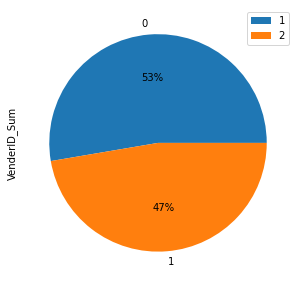

In [23]:
query = '''
         SELECT 
            CAST(VendorID AS INTEGER) AS VENDOR_ID, 
            COUNT(VendorID) AS VenderID_Sum
            FROM taxi
         GROUP BY
            VendorID
        '''
bc.sql(query).to_pandas().plot(kind = 'pie', x = 'VENDOR_ID', y= 'VenderID_Sum', figsize = (5,5), autopct='%1.0f%%').legend([1,2])


<AxesSubplot:title={'center':'average amount for each passenger count'}, xlabel='passenger_count'>

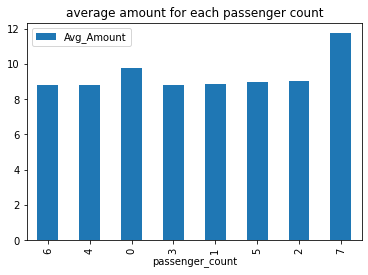

In [26]:

query='''
        SELECT 
            AVG(total_amount) AS Avg_Amount, 
            CAST(passenger_count AS INTEGER) AS passenger_count
        FROM 
            taxi 
        GROUP BY 
            passenger_count 
'''
bc.sql(query).to_pandas().plot(kind = 'bar', x = 'passenger_count', y = 'Avg_Amount', title = 'average amount for each passenger count'
)


<AxesSubplot:title={'center':'Highest total amount for trips'}, xlabel='VendorID', ylabel='total_amount'>

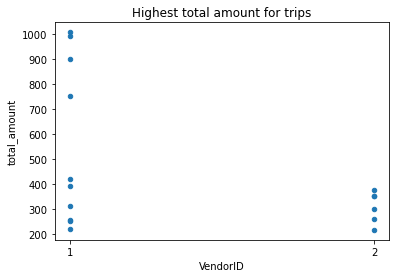

In [34]:
query = '''
       SELECT 
           DISTINCT VendorID , 
           total_amount, passenger_count
       FROM 
           taxi
       WHERE 
           total_amount > 200
       ORDER BY 
           total_amount DESC
        '''
bc.sql(query).to_pandas().plot( kind = 'scatter', x = 'VendorID', y = 'total_amount', xticks = [1,2], title = 'Highest total amount for trips')



## Write 2+ Queries to the Bucket

In [26]:
query = '''
        SELECT 
              VendorID, passenger_count, 
              total_amount, payment_type,
              tpep_dropoff_datetime
        FROM 
             taxi
        '''
bc.sql(query).to_csv('info_trips.csv', index=False)

In [27]:
query = '''
        SELECT 
              VendorID, 
              tpep_pickup_datetime, 
              tpep_dropoff_datetime
        FROM 
             taxi
        '''
bc.sql(query).to_csv('info_trips2.csv', index=False)

### Create New Tables from the Files You just Wrote

In [28]:
bc.create_table('info_trips', 'info_trips.csv')
bc.sql('SELECT * FROM info_trips') 

,VendorID,passenger_count,total_amount,payment_type,tpep_dropoff_datetime
0,<NA>,<NA>,<NA>,<NA>,tpep_dropoff_datetime
1,2.0,1.0,8.8,1.0,2015-03-05T07:44:06Z
2,1.0,1.0,8.16,1.0,2015-02-03T05:46:54Z
3,2.0,1.0,16.8,2.0,2015-02-08T16:37:45Z
4,2.0,3.0,6.8,2.0,2015-03-07T02:22:18Z
...,...,...,...,...,...
999996,2.0,1.0,6.3,2.0,2015-02-23T22:17:34Z
999997,2.0,1.0,0.3,2.0,2015-01-22T03:49:51Z
999998,2.0,2.0,26.62,1.0,2015-02-05T16:38:43Z
999999,2.0,1.0,0.3,1.0,2015-01-27T18:40:06Z


In [29]:
bc.create_table('info_trips2', 'info_trips2.csv')
bc.sql('SELECT * FROM info_trips2') 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime
0,<NA>,tpep_pickup_datetime,tpep_dropoff_datetime
1,2.0,2015-03-05T07:38:36Z,2015-03-05T07:44:06Z
2,1.0,2015-02-03T05:41:55Z,2015-02-03T05:46:54Z
3,2.0,2015-02-08T16:17:51Z,2015-02-08T16:37:45Z
4,2.0,2015-03-07T02:17:05Z,2015-03-07T02:22:18Z
...,...,...,...
999996,2.0,2015-02-23T22:14:26Z,2015-02-23T22:17:34Z
999997,2.0,2015-01-22T03:46:03Z,2015-01-22T03:49:51Z
999998,2.0,2015-02-05T16:19:05Z,2015-02-05T16:38:43Z
999999,2.0,2015-01-27T18:29:36Z,2015-01-27T18:40:06Z


#### Query those Tables (5+ Queries)

In [30]:
query = '''

        SELECT
             *
        FROM 
             info_trips 
        WHERE 
             total_amount <> 20
        LIMIT 30
        
        '''
bc.sql(query)

,VendorID,passenger_count,total_amount,payment_type,tpep_dropoff_datetime
0,2.0,1.0,8.80,1.0,2015-03-05T07:44:06Z
1,1.0,1.0,8.16,1.0,2015-02-03T05:46:54Z
2,2.0,1.0,16.80,2.0,2015-02-08T16:37:45Z
3,2.0,3.0,6.80,2.0,2015-03-07T02:22:18Z
4,2.0,2.0,7.80,1.0,2015-02-05T21:10:33Z
5,2.0,1.0,0.30,2.0,2015-01-27T18:35:01Z
6,1.0,1.0,0.00,1.0,2015-01-04T10:38:10Z
7,2.0,5.0,8.80,2.0,2015-02-04T23:32:07Z
8,2.0,1.0,10.18,1.0,2015-02-04T17:13:50Z
9,2.0,5.0,0.30,1.0,2015-01-25T14:34:01Z


In [32]:
query = '''

        SELECT 
              *
        FROM 
             info_trips2
        
        '''
bc.sql(query)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime
0,<NA>,tpep_pickup_datetime,tpep_dropoff_datetime
1,2.0,2015-03-05T07:38:36Z,2015-03-05T07:44:06Z
2,1.0,2015-02-03T05:41:55Z,2015-02-03T05:46:54Z
3,2.0,2015-02-08T16:17:51Z,2015-02-08T16:37:45Z
4,2.0,2015-03-07T02:17:05Z,2015-03-07T02:22:18Z
...,...,...,...
999996,2.0,2015-02-23T22:14:26Z,2015-02-23T22:17:34Z
999997,2.0,2015-01-22T03:46:03Z,2015-01-22T03:49:51Z
999998,2.0,2015-02-05T16:19:05Z,2015-02-05T16:38:43Z
999999,2.0,2015-01-27T18:29:36Z,2015-01-27T18:40:06Z


In [33]:
#FULL OUTER JOIN by tpep_dropoff_datetime
query = '''
        SELECT 
            info_trips.passenger_count, 
            info_trips.total_amount, 
            info_trips2.tpep_pickup_datetime 
        FROM 
            info_trips 
        FULL OUTER JOIN 
            info_trips2 
            ON info_trips.tpep_dropoff_datetime = info_trips2.tpep_dropoff_datetime
            '''
bc.sql(query)

,passenger_count,total_amount,tpep_pickup_datetime
0,1.0,22.55,2015-02-02T21:57:49Z
1,1.0,4.80,2015-02-08T10:41:37Z
2,1.0,0.30,2015-01-20T19:16:42Z
3,1.0,11.30,2015-02-10T20:08:02Z
4,5.0,0.00,2015-01-13T13:31:36Z
...,...,...,...
1159778,1.0,11.30,2015-02-09T07:59:12Z
1159779,1.0,14.15,2015-02-09T16:46:25Z
1159780,1.0,13.56,2015-03-28T19:47:16Z
1159781,1.0,14.30,2015-03-24T14:38:46Z


In [34]:
#INNER JOIN MULTI-COLUMN by tpep_pickup_datetime & VendorID
query = '''
        SELECT 
            info_trips.VendorID,info_trips.total_amount,info_trips.payment_type,
            info_trips2.tpep_pickup_datetime, info_trips2.tpep_dropoff_datetime
        FROM
            info_trips
        INNER JOIN 
            info_trips2 
            ON info_trips.tpep_dropoff_datetime = info_trips2.tpep_dropoff_datetime
            AND info_trips.VendorID = info_trips2.VendorID
            '''
bc.sql(query)

,VendorID,total_amount,payment_type,tpep_pickup_datetime,tpep_dropoff_datetime
0,1.0,0.00,1.0,2015-01-04T17:03:12Z,2015-01-04T17:13:31Z
1,1.0,6.85,1.0,2015-03-09T11:53:56Z,2015-03-09T11:57:27Z
2,1.0,9.95,1.0,2015-02-09T14:10:21Z,2015-02-09T14:19:00Z
3,1.0,14.80,2.0,2015-02-20T14:27:32Z,2015-02-20T14:44:58Z
4,2.0,0.30,1.0,2015-01-24T00:38:53Z,2015-01-24T00:57:16Z
...,...,...,...,...,...
1080347,2.0,0.30,1.0,2015-01-07T19:26:17Z,2015-01-07T19:29:43Z
1080348,1.0,0.30,1.0,2015-01-18T18:26:44Z,2015-01-18T18:33:58Z
1080349,1.0,0.30,1.0,2015-01-18T18:16:15Z,2015-01-18T18:33:58Z
1080350,2.0,0.30,2.0,2015-01-01T14:11:55Z,2015-01-01T14:17:29Z


In [35]:
#LEFT JOIN MULTI-COLUMN by tpep_pickup_datetime & VendorID
query = '''
        SELECT 
            info_trips.passenger_count, 
            info_trips.total_amount, 
            info_trips2.tpep_pickup_datetime 
        FROM 
            info_trips 
        LEFT JOIN
            info_trips2 
            ON info_trips.tpep_dropoff_datetime = info_trips2.tpep_dropoff_datetime
            AND info_trips.VendorID = info_trips2.VendorID
            '''
bc.sql(query)

,passenger_count,total_amount,tpep_pickup_datetime
0,1.0,13.55,2015-02-09T19:39:38Z
1,6.0,11.30,2015-03-31T20:54:06Z
2,2.0,5.80,2015-03-17T15:07:13Z
3,1.0,18.55,2015-02-05T21:02:19Z
4,1.0,24.96,2015-03-04T09:44:39Z
...,...,...,...
1080348,1.0,12.30,2015-02-07T13:51:43Z
1080349,2.0,9.35,2015-03-21T13:50:58Z
1080350,1.0,0.30,2015-01-25T17:54:48Z
1080351,5.0,6.36,2015-02-20T07:41:31Z
